# XGBoost   very very imp question in interview

### LinearRegression => Only works as Algorithm
### LogicticRegression => Only works as Algorithm

.....

### dataset => - 10 features
 - 1,2,3,4,5,6,7,8,9,10    11 is a target    

## XGBoost => 
1. This is an aglorithm 
2. helpful to get the best the features
   - WE can select the best features


## 1 Introduction
- XGBoost stands for eXtreme Gradient Boosting.
- XGBoost is a decision - tree - based ensemble Machine learning algorthim that uses a gradient boosting framework.
- It combines the predictions framework.
- So that it get the better performance

## 2 Why Use XGBoost?
- The two reasons to use XGBoost are also the two goals of the project:
  - Execution Speed.
  - Model Performance.

In [1]:
## 3 install XGBoost

pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 5.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


## 4 Dataset explanation
- We are going to works with pima-indians-diabetes.cvs
- This Dataset is related to health care domain
- Pima Indian are a Native American group that lives in Mexico and Arizona,USA
- It describes patient medical record data for pima Indians and whether they had a diabetes within five years.
- The Prime Indian Diabetes dataset consisting of Pima Indian females 21 years and older is a popular benchmark dataset.
- It is binary clasification problem (oneset of diabetes as 1 or not as 0).
- All of the input variables that describe each patient are numberical

## 5 Input Output from the Dataset
## 5.1 Input Variables (X):

1. Number of the times pregnant
2. Plasma glucose concentration at 2 hours in an oral glucose tolerance test
3. Diatolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-hour serum insulin (uIU/ml)
6. Body mass index (weight in kg/(height in m))
7. Diabetes pedigree function 
8. Age (years)

## 5.2 Output Variables (y):
1. Class variabe (0 or 1)

In [7]:
import pandas as pd

df=pd.read_csv("/Users/apple/Downloads/diabetes.csv")
print(df.head())
print(df.info())
print(df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [16]:
# loading the dataframe 

import pandas as pd

df=pd.read_csv("/Users/apple/Downloads/diabetes.csv")

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [24]:
# Loading the cvs file

from numpy import loadtxt

df=loadtxt("/Users/apple/Downloads/diabetes.csv", delimiter=',', skiprows=1)

print(df)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


## If there is not header for csv file then pandas will consider first row as HEADER 

In [30]:
# Preparing input (X) and output (y) variables

from numpy import loadtxt

df = loadtxt("/Users/apple/Downloads/diabetes.csv",delimiter=',',skiprows=1)

X=df[:,0:8]
y=df[:,8]

print(X)
print()
print(y)

print("Input and output ")

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0.

In [32]:
# splitting the dataset 

from numpy import loadtxt
from sklearn.model_selection import train_test_split

df = loadtxt("/Users/apple/Downloads/diabetes.csv",
             delimiter=',',
             skiprows=1)

X=df[:,0:8]
y=df[:,8]

X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y,
                                               train_size=0.3,
                                               random_state=2)

print("Train and test dataset")

Train and test dataset


In [33]:
# Model creation 

from numpy import loadtxt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

df = loadtxt("/Users/apple/Downloads/diabetes.csv",
             delimiter=',',
             skiprows=1)

X=df[:,0:8]
y=df[:,8]

X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y,
                                               train_size=0.3,
                                               random_state=2)

model =XGBClassifier()
print("Model training ")

In [39]:
# Train the model  


from numpy import loadtxt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

df = loadtxt("/Users/apple/Downloads/diabetes.csv",
             delimiter=',',
             skiprows=1)

X=df[:,0:8]
y=df[:,8]

X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y,
                                               train_size=0.3,
                                               random_state=2)

model=XGBClassifier()
model.fit(X_train,y_train)
#print("Model trained")

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [45]:
# model perdiction  and checking score


from numpy import loadtxt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

df = loadtxt("/Users/apple/Downloads/diabetes.csv",
             delimiter=',',
             skiprows=1)

X=df[:,0:8]
y=df[:,8]

X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y,
                                               train_size=0.3,
                                               random_state=2)

model=XGBClassifier()
model.fit(X_train,y_train)

predictions=model.predict(X_test)

print(X_test)
print()
print(predictions)

print()
print(model.score(X_test,y_test))

[[  2.     88.     74.    ...  29.      0.229  22.   ]
 [  2.    129.     84.    ...  28.      0.284  27.   ]
 [  0.    102.     78.    ...  34.5     0.238  24.   ]
 ...
 [  1.    118.     58.    ...  33.3     0.261  23.   ]
 [  5.     97.     76.    ...  35.6     0.378  52.   ]
 [  0.    100.     88.    ...  46.8     0.962  31.   ]]

[0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0
 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 

In [9]:
# checking the model accuracy 

from numpy import loadtxt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

df = loadtxt("/Users/apple/Downloads/diabetes.csv",
             delimiter=',',
             skiprows=1)

X=df[:,0:8]
y=df[:,8]

X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y,
                                               train_size=0.3,
                                               random_state=2)

model=XGBClassifier()
model.fit(X_train,y_train)

predictions=model.predict(X_test)

accuracy=accuracy_score(y_test,predictions)
print(accuracy)

0.7230483271375465


## 6. Label Encoding
- The iris flowers classification problem is an example of a problem that has a string class value.
- XBoost cannot model this problem because output variables are strings, we need to convert output variables be numeric.
- We can easily convert the string values to integer values using the LabelEncoder.
- The three class values
  - (Iris-setosa, Iris-versicolor, Iris-virginica) are mapped to the integer values (0, 1, 2).

In [20]:
#loading the dataset


import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

df=pd.read_csv("/Users/apple/Downloads/Iris (1).csv",header=None,skiprows=1)
#print(df.head())
X=df.iloc[:,0:4]
Y=df.iloc[:,4]


label_encoder=LabelEncoder()
label_encodr=label_encoder.fit(Y)
label_encoder_y=label_encoder.transform(Y)

y=label_encoder_y

X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y,
                                               train_size=0.7,
                                               random_state=2)

model=XGBClassifier()
model.fit(X_train,y_train)

predictions=model.predict(X_test)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20], got [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]

## 7. Feature Importance with XBoost and Feature Selection

- XGBoost is helping to get important teatures trom the existing features
- We can see like every features how much score it having.

[0.08783077 0.25644538 0.09513389 0.0798838  0.08624522 0.16016689
 0.09921229 0.13508178]


<BarContainer object of 8 artists>

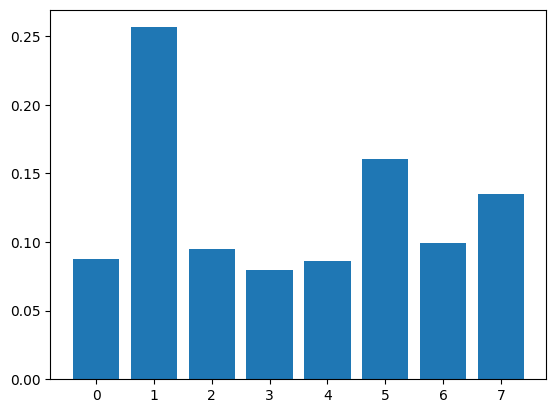

In [4]:
# to get the best the features

from numpy import loadtxt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

df = loadtxt("/Users/apple/Downloads/diabetes.csv",
             delimiter=',',
             skiprows=1)

X=df[:,0:8]
y=df[:,8]

X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y,
                                               train_size=0.3,
                                               random_state=2)

model=XGBClassifier()
model.fit(X,y)

print(model.feature_importances_)

r=range(len(model.feature_importances_))
f=model.feature_importances_

plt.bar(r,f)